In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"

# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-penjualan/Dataset.xlsx


Karena data penjualan ini memiliki kolom lebih dari dari 2, jadi bisa dikatakan memiliki variabel independent lebih dari satu.
atau data tidak bisa dimodelkan secara simple regresi linear. tapi butuh dimodelkan secara Multiple Linear Regression.

Persamaan dari Multiple Linear Regression sebagai berikut :

Y = b + e + m1*x1 + m2*x2 + … + mn*xn

Y = dependent variable

mn = koefisien dari persamaan

xn = independent variable

b = intercept

e = error

Perbedaan dengan Simple Linear Regression hanyalah jumlah independent variable (x). Di Multiple Linear Regression terdapat lebih dari 1. Tapi tujuan dari kedua metode tersebut adalah sama yaitu untuk memprediksi nilai dari Y.

In [ ]:
#library untuk data analysis tools.
import pandas as pd
import numpy as np

#library untuk visualisasi data.
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

karena jupyter notebook belum pernah terinstall library untuk membuka data .xlsx
maka perlu diinstall dulu

In [ ]:
#install library untuk membuka data dalam bentuk xlsx
!pip install openpyxl

     |████████████████████████████████| 244 kB 4.3 MB/s 


In [ ]:
#proses pembacaan data atau import data

df = pd.read_excel('/kaggle/input/dataset-penjualan/Dataset.xlsx')

In [ ]:
#Melihat 5 baris teratas dari data.
#Independent variabel(x) adalah Tanggal, Kegiatan, Curah hujan, Penjualan.
#Dependent variabel(y) adalah Penjualan.
df.head()

,Hari,Tanggal,Kegiatan,Curah Hujan (mm),Penjualan (pcs)
0,2,1,0,1.4,0
1,3,2,1,1.2,27
2,4,3,1,15.2,458
3,5,4,1,13.4,20
4,6,5,1,7.7,7


In [ ]:
#Melihat 5 baris terbawah dari data
df.tail()

,Hari,Tanggal,Kegiatan,Curah Hujan (mm),Penjualan (pcs)
116,4,4,1,2.2,430
117,5,5,1,0.5,208
118,6,6,1,33.4,200
119,0,7,0,0.0,0
120,1,8,1,0.0,143


Data yang diberikan oleh Pak budi adalah 5 kolom dan 121 baris, jadi perlu di cek ulang setelah proses import data

In [ ]:
#Mengecek jumlah kolom dan baris dari data.
#Data awal mempunya 4 kolom (features) dengan 121 baris.
df.shape

(121, 5)

cocok dengan data awal, (121,5) 121 baris dan 5 kolom

setelah itu untuk Melihat informasi data mulai dari jumlah data, tipe data, memory yang digunakan dll. maka perlu dilakukan tinjauan data ulang

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hari              121 non-null    int64  
 1   Tanggal           121 non-null    int64  
 2   Kegiatan          121 non-null    int64  
 3   Curah Hujan (mm)  121 non-null    float64
 4   Penjualan (pcs)   121 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 4.9 KB


dari tinjauan di atas terdapat data float dan juga data int

In [ ]:
#melihat rata-rata data
df.mean()

Hari                  2.958678
Tanggal              15.123967
Kegiatan              0.818182
Curah Hujan (mm)     14.259504
Penjualan (pcs)     131.834711
dtype: float64

In [ ]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.
df.describe()

,Hari,Tanggal,Kegiatan,Curah Hujan (mm),Penjualan (pcs)
count,121.000000,121.000000,121.000000,121.000000,121.000000
mean,2.958678,15.123967,0.818182,14.259504,131.834711
std,2.018236,9.218252,0.387298,27.540254,141.596866
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,7.000000,1.000000,0.000000,5.000000
50%,3.000000,15.000000,1.000000,2.100000,52.000000
75%,5.000000,23.000000,1.000000,16.400000,238.000000
max,6.000000,31.000000,1.000000,170.600000,458.000000


Karena ada data dalam bentuk float dan dalam bentuk int. jadi dilakukan manipulasi data, rubah data float menjadi int

In [ ]:
#Merubah tipe data dari bathrooms yang semula float menjadi int.
df['Curah Hujan (mm)'] = df['Curah Hujan (mm)'].astype('int')

Sebelum dilakukan analisis data juga perlu dilakukan tinjauan data Null (data yang tidak di isi kan ke dalam tabel)

In [ ]:
#Mencari dan menangani missing values. Null
df.isnull().sum()

Hari                0
Tanggal             0
Kegiatan            0
Curah Hujan (mm)    0
Penjualan (pcs)     0
dtype: int64

aman , sebab semua data terisi

selanjutnya dilakukan eksplorasi di setiap kolom data

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


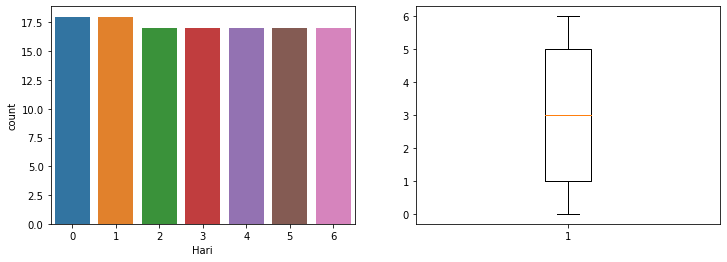

In [ ]:
#melakukan Exploratory Data Hari kerja untuk dianalysis dan mengenal data lebih jauh

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['Hari'])
f.add_subplot(1,2,2)
plt.boxplot(df['Hari'])
plt.show()

dari grafik di atas :
- menunjukkan setiap hari dari senin-minggu bagian marketing selalu bekerja
- senin-selasa lebih tinggi sedikit karena ada kelebihan data 2 hari data 0 dan 1 di akhir pengambilan data

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


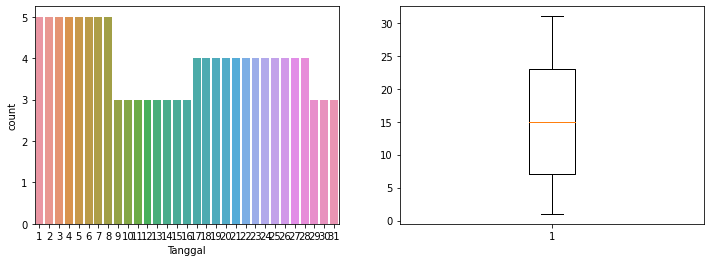

In [ ]:
#melakukan Exploratory Data Tanggal untuk dianalysis dan mengenal data lebih jauh

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['Tanggal'])
f.add_subplot(1,2,2)
plt.boxplot(df['Tanggal'])
plt.show()

dari grafik di atas :
tanggal 1 sampai dengan 8 lebih tinggi sedikit karena ada kelebihan data di akhir pengambilan data

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


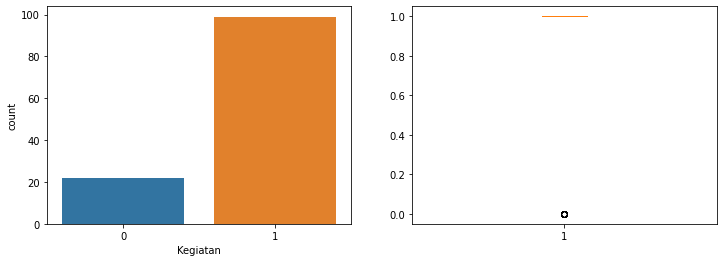

In [ ]:
#melakukan Exploratory Data Kegiatan untuk dianalysis dan mengenal data lebih jauh

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['Kegiatan'])
f.add_subplot(1,2,2)
plt.boxplot(df['Kegiatan'])
plt.show()

grafik di atas menunjukkan bagian marketing memang lebih banyak berkegiatan selama diambil data

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


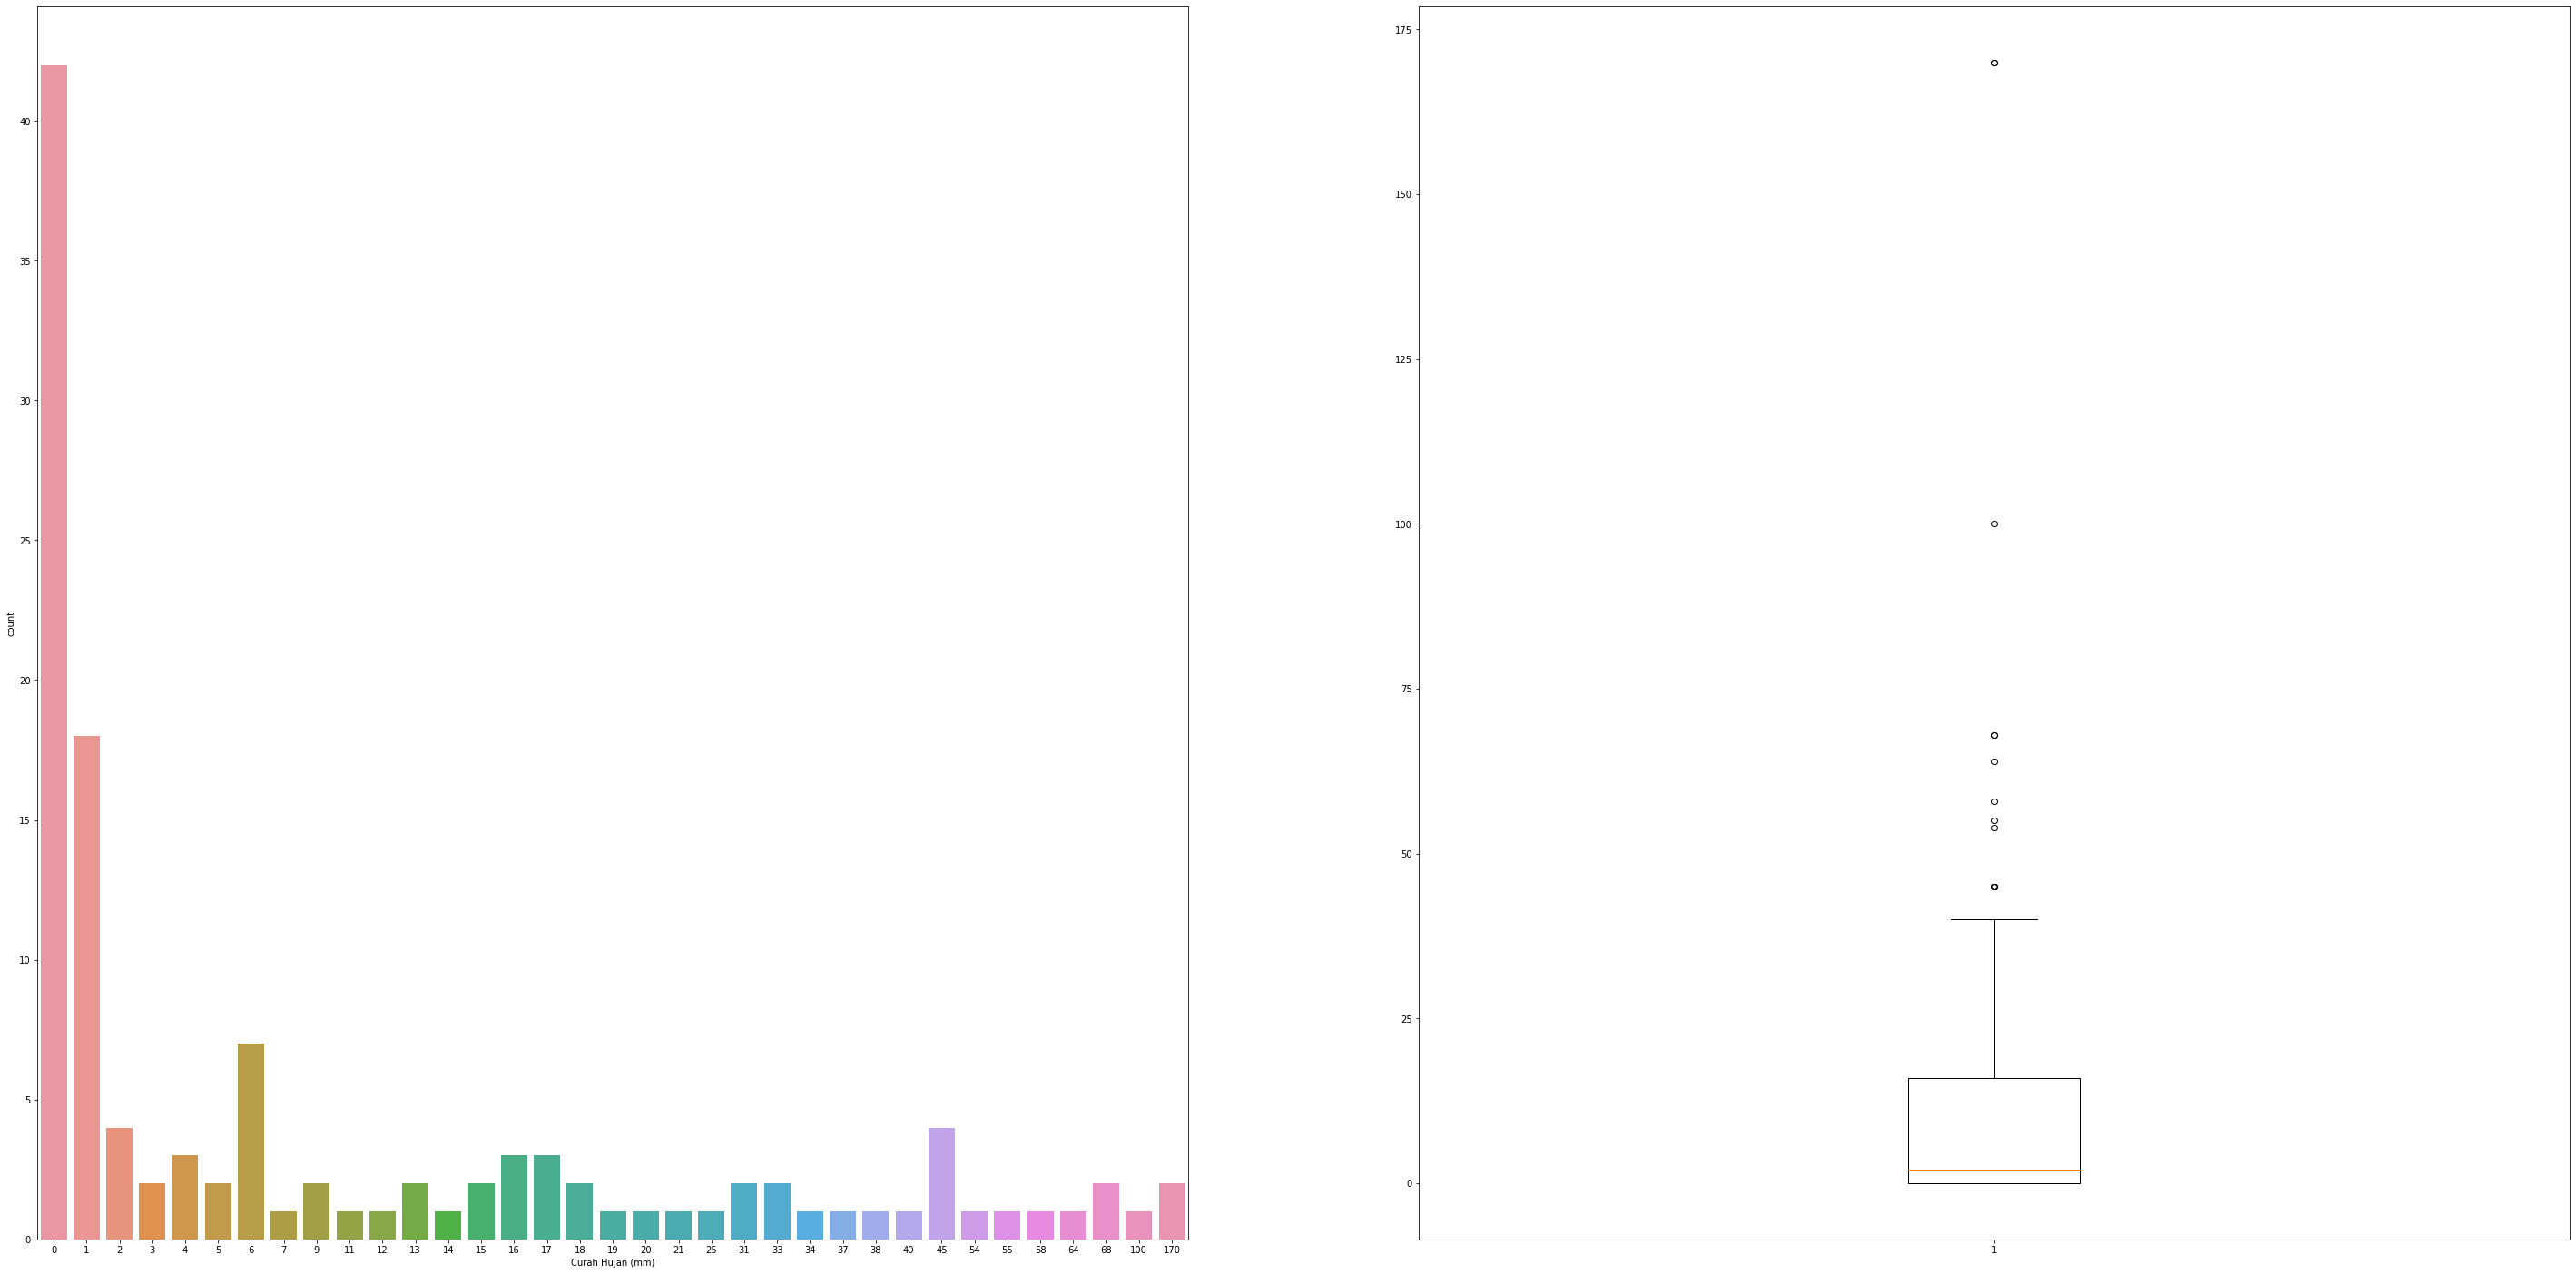

In [ ]:
#melakukan Exploratory Data Curah Hujan untuk dianalysis dan mengenal data lebih jauh

f = plt.figure(figsize=(50,25))
f.add_subplot(1,2,1)
sns.countplot(df['Curah Hujan (mm)'])
f.add_subplot(1,2,2)
plt.boxplot(df['Curah Hujan (mm)'])
plt.show()

grafik di atas menunjukkan curah hujan cukup aman untuk kegiatan marketing karena intesitas hujan rendah lebih banyak

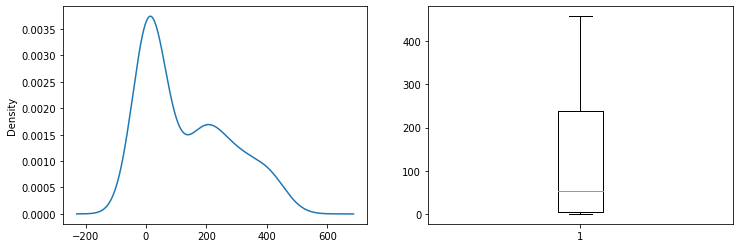

In [ ]:
#melakukan Exploratory Data Penjualan untuk dianalysis dan mengenal data lebih jauh

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['Penjualan (pcs)'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['Penjualan (pcs)'])
plt.show()

dari grafik di atas hasil density distribusi dari penjualan banyak terjadi di 0-130 an  

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

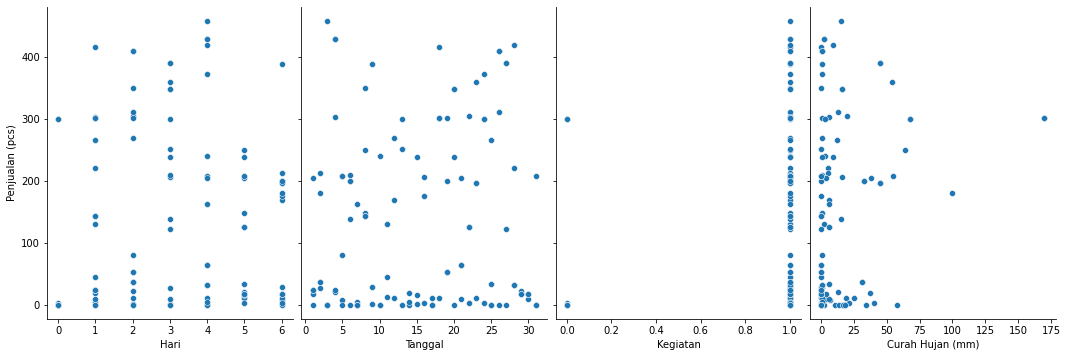

In [ ]:
#menganalysis variasi antara independent variable dan dependent variable.

plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['Hari', 'Tanggal', 'Kegiatan', 'Curah Hujan (mm)'], y_vars=['Penjualan (pcs)'], size=5, aspect=0.75)

dari grafik di atas :
- penjualan dengan jumlah tinggi terjadi di hari selasa/1, rabu/2, kamis/3, jumat/4, dan minggu/6

- puncak hasil penjulan terjadi di tanggal 1 s/d 5 (awal bulan)

- penjualan tinggi terjadi ketika curah hujan cukup rendah

In [ ]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable.
df.corr().style.background_gradient().set_precision(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,Hari,Tanggal,Kegiatan,Curah Hujan (mm),Penjualan (pcs)
Hari,1.00,-0.00,0.54,-0.03,0.13
Tanggal,-0.00,1.00,0.07,0.10,0.09
Kegiatan,0.54,0.07,1.00,0.01,0.35
Curah Hujan (mm),-0.03,0.10,0.01,1.00,0.26
Penjualan (pcs),0.13,0.09,0.35,0.26,1.00


Dari tabel korelasi dan gambar pairplot, dapat dilihat bahwa :
- hari sangat memiliki hubungan yang lebih erat terhadap kegiatan marketing (0,53)
- kegiatan marketing memiliki hubungan yang erat terhadap penjualan (0,35)
- Curah hujan memiliki hubungan yang erat terhadap penjualan (0,26)

- hari dan tanggal tidak ada hubungan sama sekali karena nilainya 0
- hari dan curah hujan tidak ada hubungan sama sekali karena nilainya sangat kecil -0,03

In [ ]:
#tahap pemodelan data
#Pertama, buat variabel x dan y.
x = df.drop(columns='Penjualan (pcs)')
y = df['Penjualan (pcs)']

#Kedua, split data menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

#Ketiga, membuat object linear regresi.
lin_reg = LinearRegression()

#Keempat, train the model menggunakan training data yang sudah displit.
lin_reg.fit(x_train, y_train)

#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b).
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ -7.56542585   0.58533328 159.53212741   1.02231269]
3.193040368908555


   dari hasil perhitungan koefisien di atas jika dibuat dalam rumus akan menjadi seperti ini

   Y = b + e + m1*x1 + m2*x2 + … + mn*xn

   Y = dependent variable
   mn = koefisien dari persamaan
   xn = independent variable
   b = intercept
   e = error

   jika semua hasil hitung koefisien dimasukan dalam rumus

   Y = -7.56542585 X1 + 0.58533328 X2 + 159.53212741 X3 + 1.02231269 X4 + 3.193040368909408

In [ ]:
#mencari tahu accuracy score dari model menggunakan testing data yang sudah displit.
lin_reg.score(x_test, y_test)

0.1040440882431356

Model Machine Learning mendapatkan accuracy score sebesar 10.4%

nilai yang sangat rendah
masih butuh banyak koreksi

In [ ]:
#Langkah terakhir adalah melakukan prediksi terhadap hasil penjualan paling optimal
#saya mencoba membuat KPI sesuai yang saya inginkan yaitu
#penjualan di hari pertama dan di minggu pertama dan tidak ada hujan

#hari         = 0
#Tanggal      = 1
#Kegiatan     = 1
#Curah Hujan  = 0

#Prediksi hasil penjualan paling optimal.
lin_reg.predict([[0,1,1,0]])

array([163.31050106])

https://www.kaggle.com/code/mochmunirulichsan/multiple-linear-regression-dataset-penjualan/notebook (Sitasi)